# Observable Trends
1 - The further you get from an urban core, the higher the cost to ride generally is.
2 - The vast majority of rides occur in the urban setting, even compared to adding suburban and rural rides.
3 - There are far more drivers in the urban setting than the other two combined.

In [313]:
%matplotlib notebook

In [314]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [315]:
# Import both datasets and combine
ride_data = pd.read_csv("ride_data.csv")
city_data = pd.read_csv("city_data.csv")
city_data_df = city_data

combined_data = pd.merge(ride_data, city_data, on="city")
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [316]:
# Groupby Cities and figure out their average fare
city_data = combined_data.groupby('city')
avg_fare = (city_data['fare'].sum()/city_data['fare'].count()).round(2)
avg_fare.head()

city
Amandaburgh      24.64
Barajasview      25.33
Barronchester    36.42
Bethanyland      32.96
Bradshawfurt     40.06
Name: fare, dtype: float64

In [317]:
# Number of rides per city
num_ride_city = combined_data["city"].value_counts()
num_ride_city.head()

West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
Name: city, dtype: int64

In [318]:
# Number of drivers per city
driver_count_city=combined_data.groupby('city')['driver_count'].mean()
driver_count_city.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [319]:
city_type = city_data_df.set_index('city')['type']


city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [320]:
pyber_cities = pd.DataFrame({'Average Fare per City': avg_fare,
                            "Number of Rides":num_ride_city,
                            "Number of Drivers":driver_count_city,
                            "City Type":city_type})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.64,18,12,Urban
Barajasview,25.33,22,26,Urban
Barronchester,36.42,16,11,Suburban
Bethanyland,32.96,18,22,Suburban
Bradshawfurt,40.06,10,7,Rural


# Bubble Plot of Ride Sharing Data

<IPython.core.display.Javascript object>


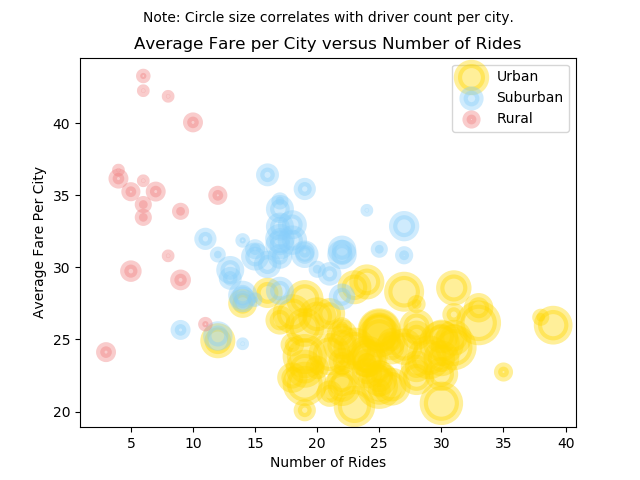

In [321]:
urban=pyber_cities.loc[pyber_cities["City Type"] =="Urban"]

suburban=pyber_cities.loc[pyber_cities["City Type"] =="Suburban"]

rural=pyber_cities.loc[pyber_cities["City Type"] =="Rural"]

plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], s=urban["Number of Drivers"]*10, c="gold", label = "Urban",alpha=0.4, linewidth=6)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], s=suburban["Number of Drivers"]*10, c="lightskyblue", label = "Suburban",alpha=0.4, linewidth=6)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], s=rural["Number of Drivers"]*10, c="lightcoral", label = "Rural",alpha=0.4, linewidth=6)
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.text(6, 47,"Note: Circle size correlates with driver count per city.")
plt.legend(loc="best")
plt.show()

# Total Fares by City Type

<IPython.core.display.Javascript object>


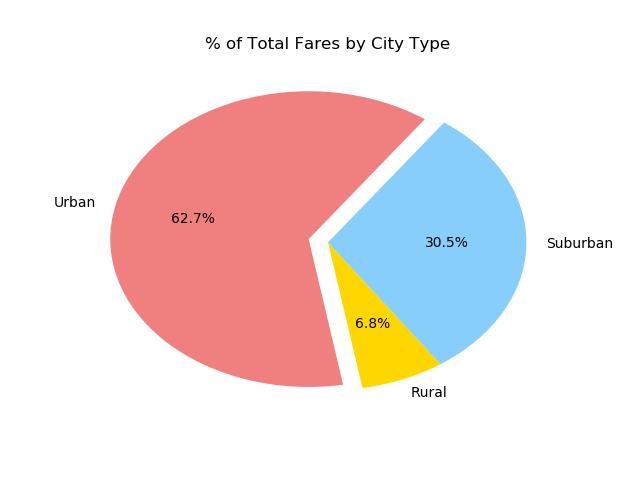

In [322]:
# Pie chart for % of total fares by city type
city_type=combined_data.groupby('type').sum()
city_type
plt.figure()
types = ["Rural", "Suburban", "Urban"]
fares = [4328, 19356, 39854]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Fares by City Type")
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=280)
plt.show()

# Total Rides by City Type

In [323]:
num_ride_data = combined_data.groupby(("type"))['ride_id'].count()
num_ride_data

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

<IPython.core.display.Javascript object>


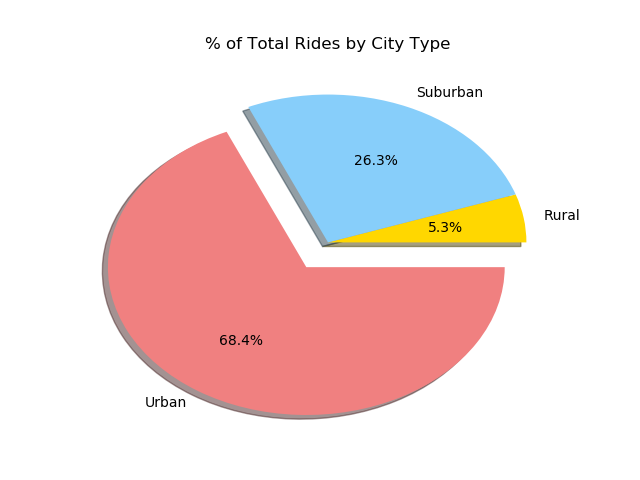

In [324]:
ride_type=num_ride_data.groupby('type').sum()
ride_type
plt.figure()
types = ["Rural", "Suburban", "Urban"]
rides = [125, 625, 1625]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.2)
plt.title("% of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

# Total Drivers by City Type

In [325]:
driver_type_data = combined_data.groupby(("type"))['driver_count'].mean()
driver_type_data

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


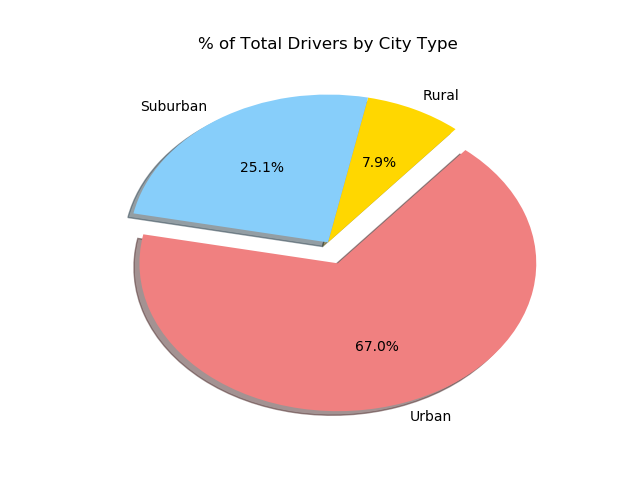

In [326]:
driver_type=driver_type_data.groupby('type').sum()
driver_type
plt.figure()
types = ["Rural", "Suburban", "Urban"]
rides = [4.3, 13.7, 36.6]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.15)
plt.title("% of Total Drivers by City Type")
plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=50)
plt.show()